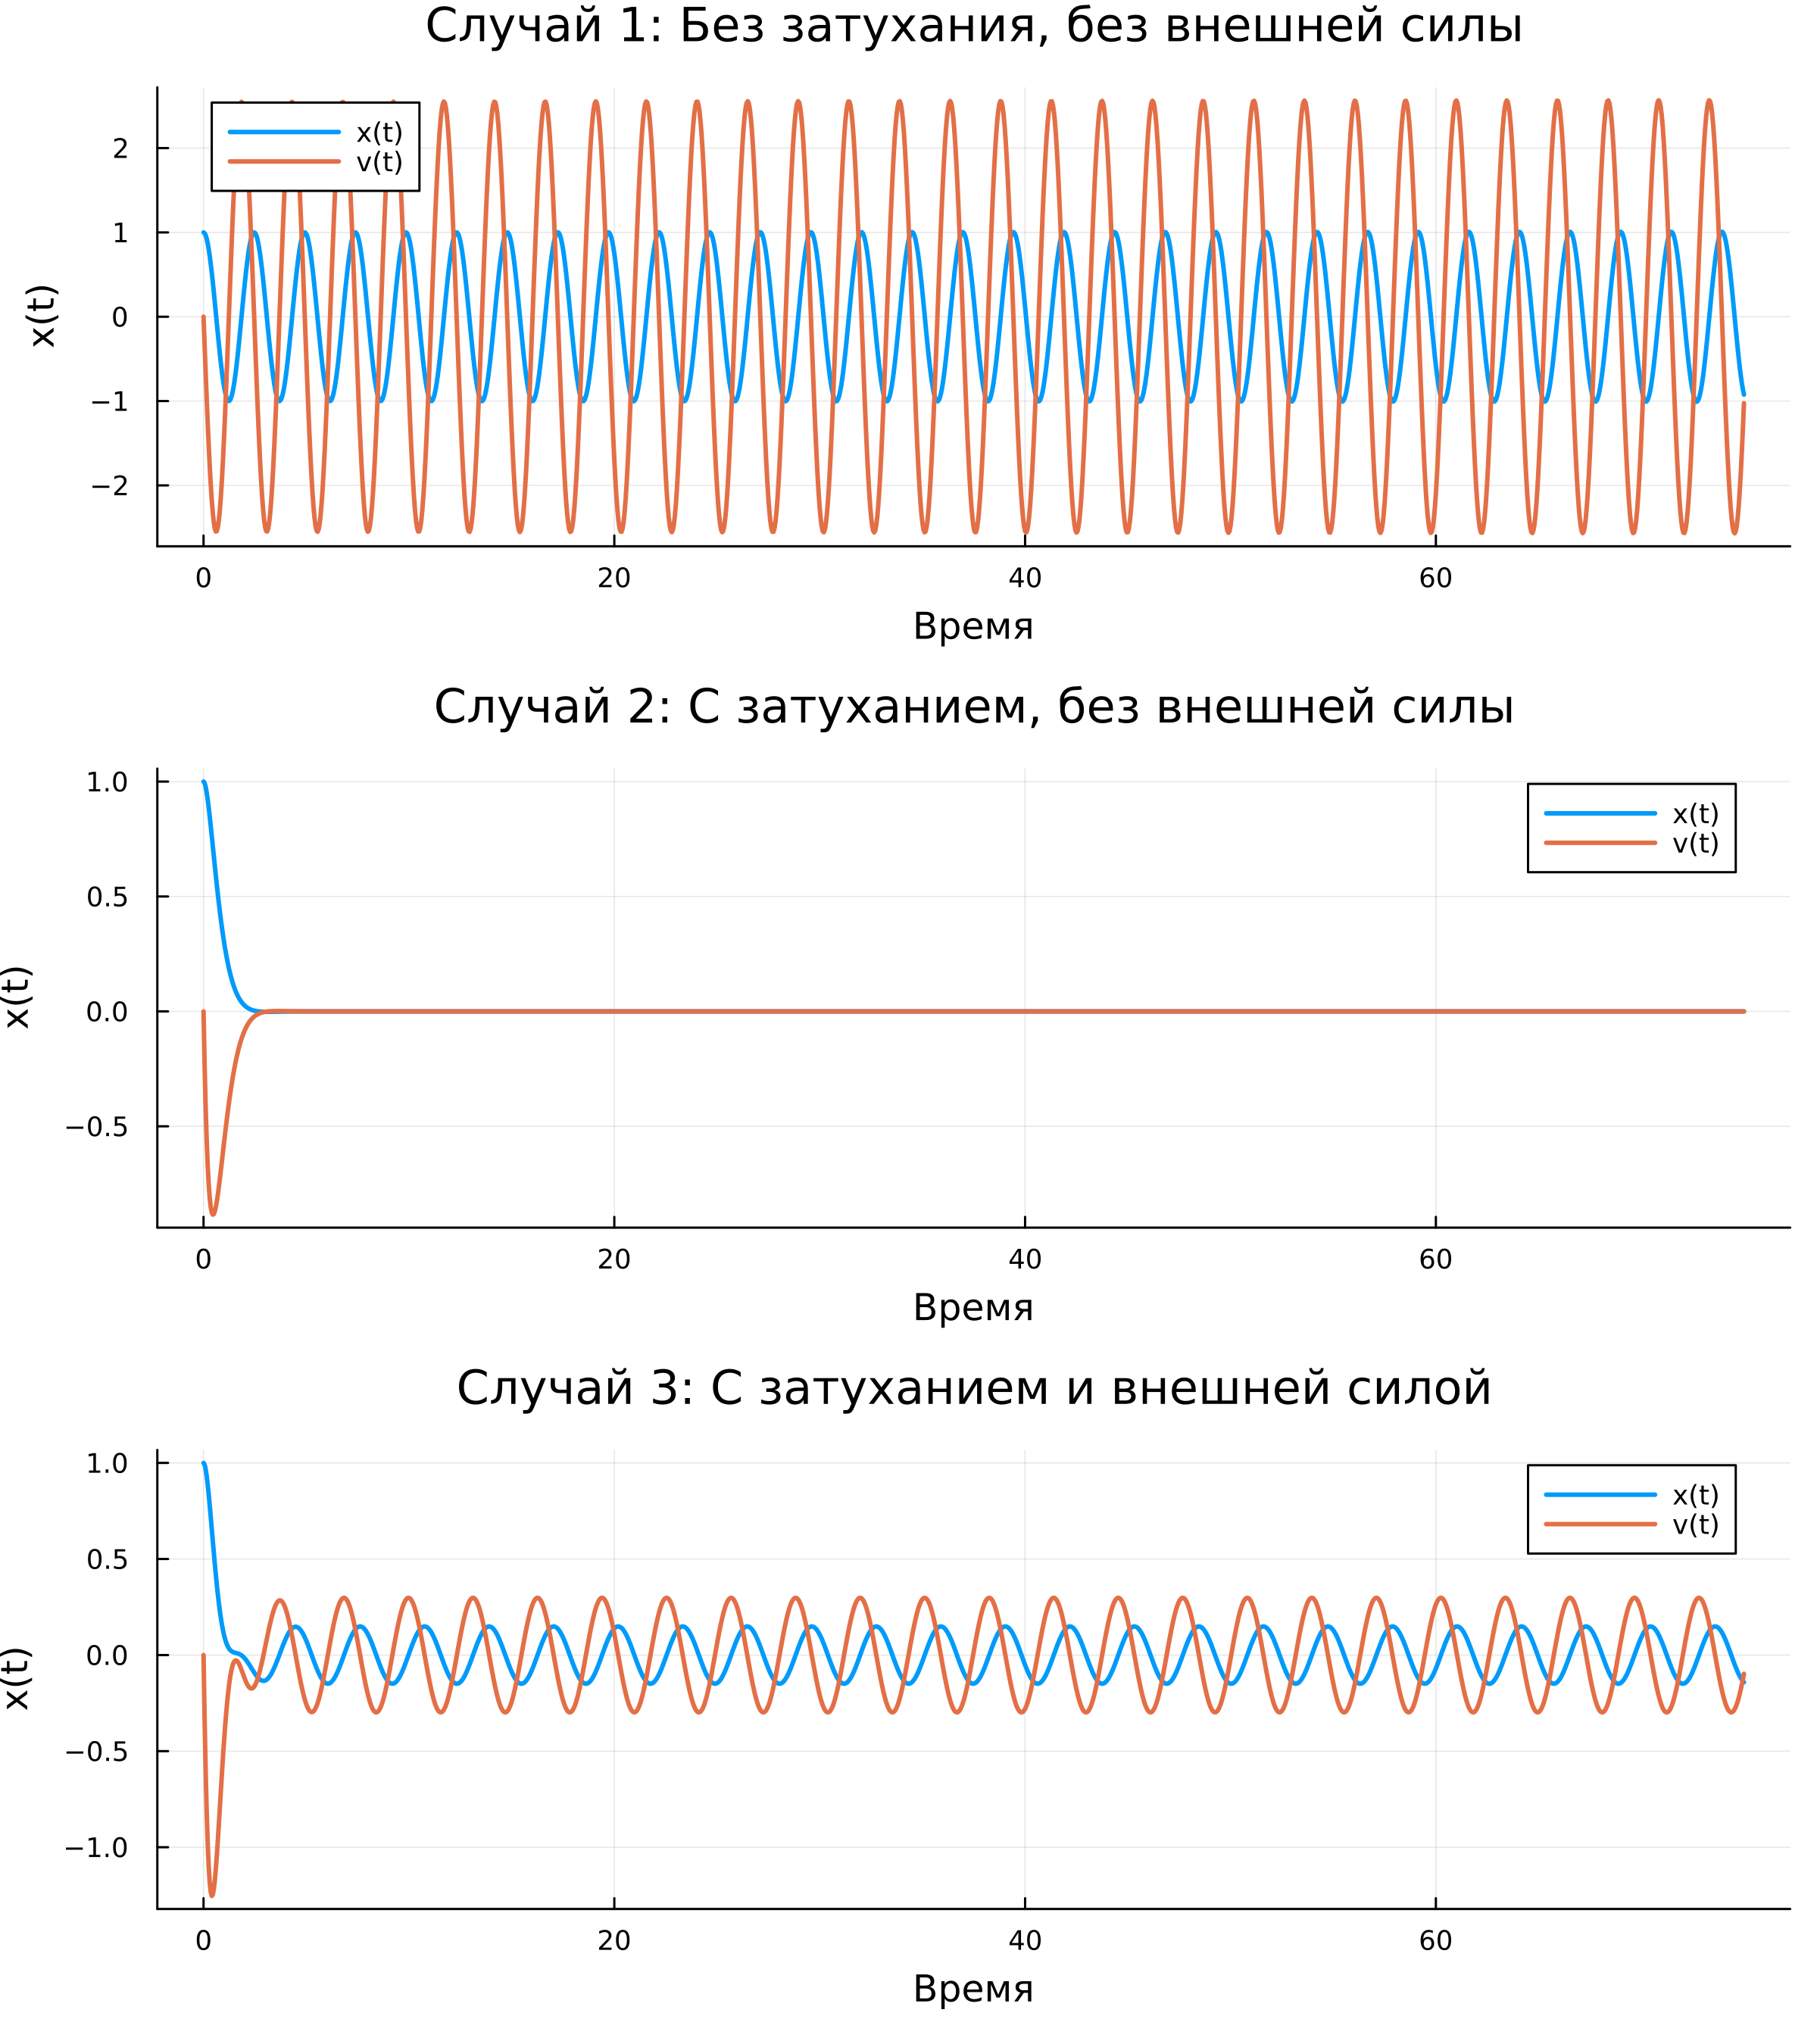

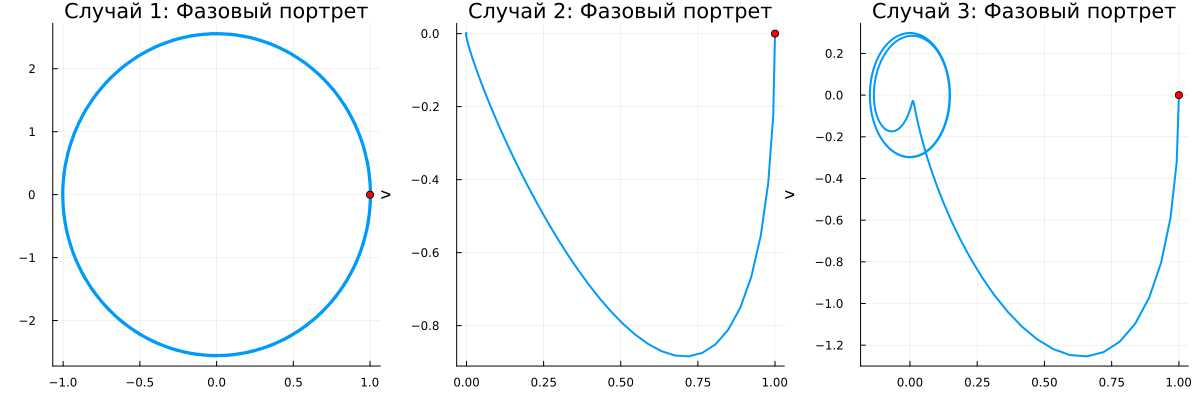

Графики сохранены в файлы:
- harmonic_oscillators_time.png - временные зависимости
- harmonic_oscillators_phase.png - фазовые портреты


In [2]:
using DifferentialEquations, Plots

# Общие параметры
tspan = (0.0, 75.0)
tsteps = 0.0:0.05:75.0
u0 = [1.0, 0.0]  # Начальные условия: x=1, v=0

# Случай 1: Без затухания, без внешней силы
function oscillator1!(du, u, p, t)
    x, v = u
    w = sqrt(6.5)
    du[1] = v          # dx/dt = v
    du[2] = -w^2 * x   # dv/dt = -ω²x
end

# Случай 2: С затуханием, без внешней силы
function oscillator2!(du, u, p, t)
    x, v = u
    gamma = 4.0
    w = sqrt(5.0)
    du[1] = v                 # dx/dt = v
    du[2] = -gamma*v - w^2*x  # dv/dt = -γv - ω²x
end

# Случай 3: С затуханием и внешней силой
function oscillator3!(du, u, p, t)
    x, v = u
    gamma = 3.0
    w = sqrt(7.0)
    du[1] = v                         # dx/dt = v
    du[2] = -gamma*v - w^2*x + sin(2*t) # dv/dt = -γv - ω²x + sin(2t)
end

# Решение всех трех случаев
prob1 = ODEProblem(oscillator1!, u0, tspan)
sol1 = solve(prob1, Tsit5(), saveat=tsteps)

prob2 = ODEProblem(oscillator2!, u0, tspan)
sol2 = solve(prob2, Tsit5(), saveat=tsteps)

prob3 = ODEProblem(oscillator3!, u0, tspan)
sol3 = solve(prob3, Tsit5(), saveat=tsteps)

# Построение решений во времени
plt_time = plot(layout=(3,1), size=(800, 900), dpi=300)

plot!(plt_time[1], sol1.t, sol1[1,:], label="x(t)", linewidth=2,
      title="Случай 1: Без затухания, без внешней силы", xlabel="Время", ylabel="x(t)")
plot!(plt_time[1], sol1.t, sol1[2,:], label="v(t)", linewidth=2)

plot!(plt_time[2], sol2.t, sol2[1,:], label="x(t)", linewidth=2,
      title="Случай 2: С затуханием, без внешней силы", xlabel="Время", ylabel="x(t)")
plot!(plt_time[2], sol2.t, sol2[2,:], label="v(t)", linewidth=2)

plot!(plt_time[3], sol3.t, sol3[1,:], label="x(t)", linewidth=2,
      title="Случай 3: С затуханием и внешней силой", xlabel="Время", ylabel="x(t)")
plot!(plt_time[3], sol3.t, sol3[2,:], label="v(t)", linewidth=2)

# Построение фазовых портретов
plt_phase = plot(layout=(1,3), size=(1200, 400))

plot!(plt_phase[1], sol1[1,:], sol1[2,:], label="Фазовая траектория", linewidth=2,
      title="Случай 1: Фазовый портрет", xlabel="x", ylabel="v", legend=false)
scatter!(plt_phase[1], [1], [0], label="Начальная точка", color=:red)

plot!(plt_phase[2], sol2[1,:], sol2[2,:], label="Фазовая траектория", linewidth=2,
      title="Случай 2: Фазовый портрет", xlabel="x", ylabel="v", legend=false)
scatter!(plt_phase[2], [1], [0], label="Начальная точка", color=:red)

plot!(plt_phase[3], sol3[1,:], sol3[2,:], label="Фазовая траектория", linewidth=2,
      title="Случай 3: Фазовый портрет", xlabel="x", ylabel="v", legend=false)
scatter!(plt_phase[3], [1], [0], label="Начальная точка", color=:red)

# Отображение графиков
display(plt_time)
display(plt_phase)

# Сохранение результатов
savefig(plt_time, "harmonic_oscillators_time.png")
savefig(plt_phase, "harmonic_oscillators_phase.png")

println("Графики сохранены в файлы:")
println("- harmonic_oscillators_time.png - временные зависимости")
println("- harmonic_oscillators_phase.png - фазовые портреты")